In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding='iso-8859-1')
dataset = df.copy()
dataset.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [121]:
dataset.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [122]:
dataset.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [123]:
dataset = dataset.drop(['Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days', 'channel_type_rank', 'country_rank', 'Abbreviation'], axis = 1)
dataset = dataset.drop(dataset.columns[-6], axis=1)
dataset.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)'],
      dtype='object')

In [124]:
dataset = dataset.dropna()
dataset.isna().sum()

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country                                    0
channel_type                               0
video_views_rank                           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
highest_yearly_earnings                    0
created_year                               0
created_month                              0
created_date                               0
Gross tertiary education enrollment (%)    0
dtype: int64

In [125]:
dataset.duplicated().sum()

0

In [126]:
dataset.shape

(824, 17)

In [127]:
dataset.head(2)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,lowest_monthly_earnings,highest_monthly_earnings,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%)
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,564600.0,9000000.00,1.084000e+08,2006.0,Mar,13.0,28.1
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,0.0,0.05,5.800000e-01,2006.0,Mar,5.0,88.2


In [128]:
sns.set(style = 'dark')

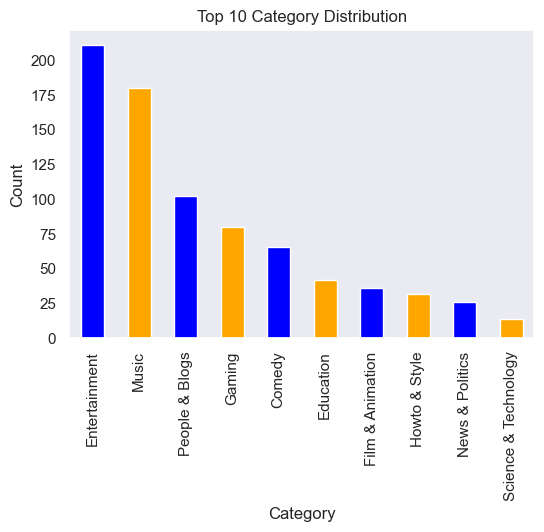

In [129]:
dataset['category'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(6,4), color = ['blue', 'orange'])
plt.title('Top 10 Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

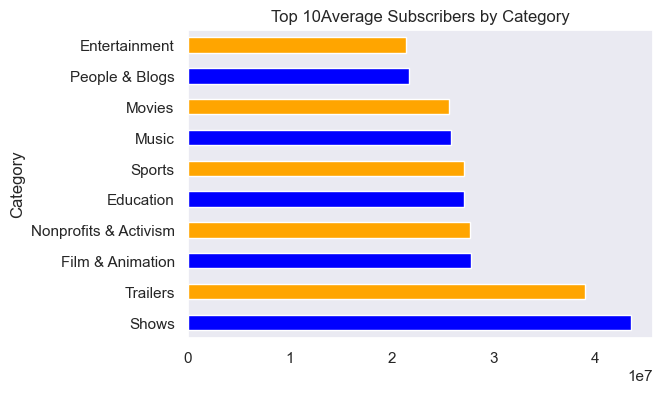

In [130]:
dataset.groupby('category')['subscribers'].mean().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(6,4), color = ['blue', 'orange'])
plt.title('Top 10Average Subscribers by Category')
plt.xlabel('')
plt.ylabel('Category')
plt.show()

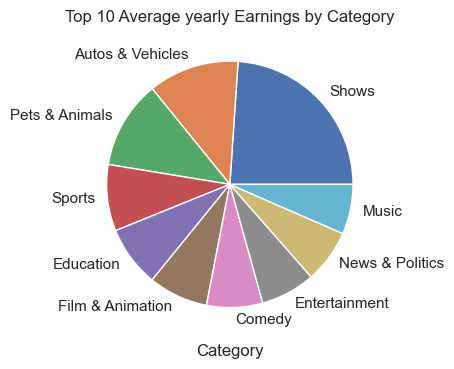

In [131]:
dataset.groupby('category')['highest_yearly_earnings'].mean().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(6,4))
plt.title('Top 10 Average yearly Earnings by Category')
plt.xlabel('Category')
plt.ylabel('')
plt.show()

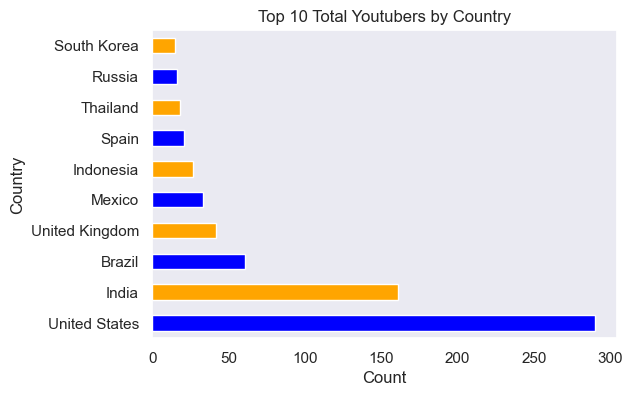

In [132]:
dataset.groupby('Country')['Youtuber'].nunique().sort_values(ascending=False).head(10).plot(kind='barh', figsize=(6,4), color = ['Blue', 'Orange'])
plt.title('Top 10 Total Youtubers by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

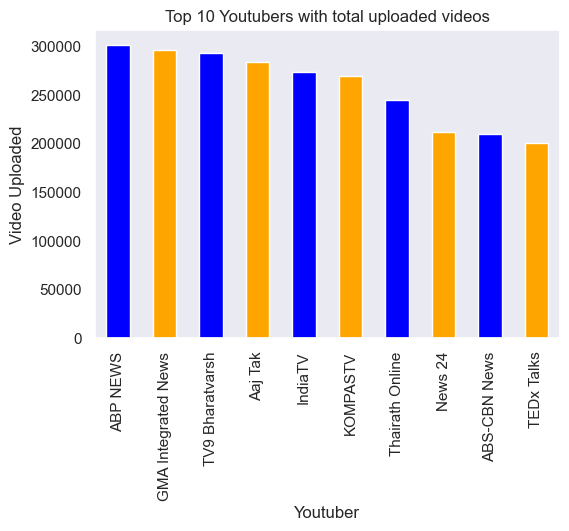

In [141]:
dataset.groupby('Youtuber')['uploads'].sum().sort_values(ascending=False).head(10).plot(kind = 'bar', figsize=(6,4), color = ['Blue', 'Orange'])
plt.title('Top 10 Youtubers with total uploaded videos')
plt.xlabel('Youtuber')
plt.ylabel('Video Uploaded')
plt.show()

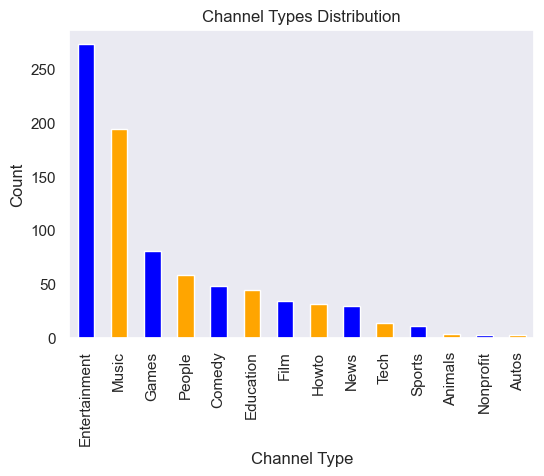

In [145]:
dataset['channel_type'].value_counts().sort_values(ascending=False).plot(kind='bar', figsize=(6,4), color = ['blue', 'orange'])
plt.title('Channel Types Distribution')
plt.xlabel('Channel Type')
plt.ylabel('Count')
plt.show()